In [1]:
import pandas as pd
import numpy as np

import seaborn as sns

import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn.preprocessing import LabelEncoder

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
exp_feats=['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

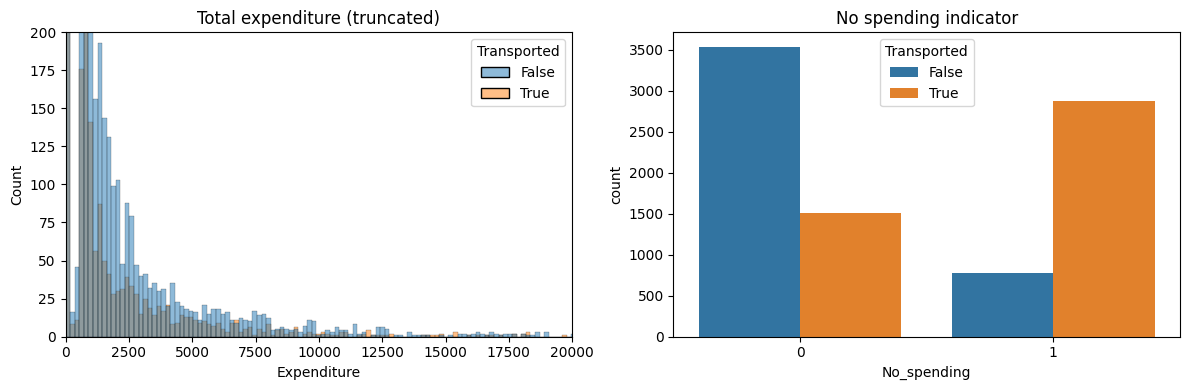

In [4]:
train['Expenditure']=train[exp_feats].sum(axis=1)
train['No_spending']=(train['Expenditure']==0).astype(int)

test['Expenditure']=test[exp_feats].sum(axis=1)
test['No_spending']=(test['Expenditure']==0).astype(int)

fig=plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(data=train, x='Expenditure', hue='Transported', bins=200)
plt.title('Total expenditure (truncated)')
plt.ylim([0,200])
plt.xlim([0,20000])

plt.subplot(1,2,2)
sns.countplot(data=train, x='No_spending', hue='Transported')
plt.title('No spending indicator')
fig.tight_layout()

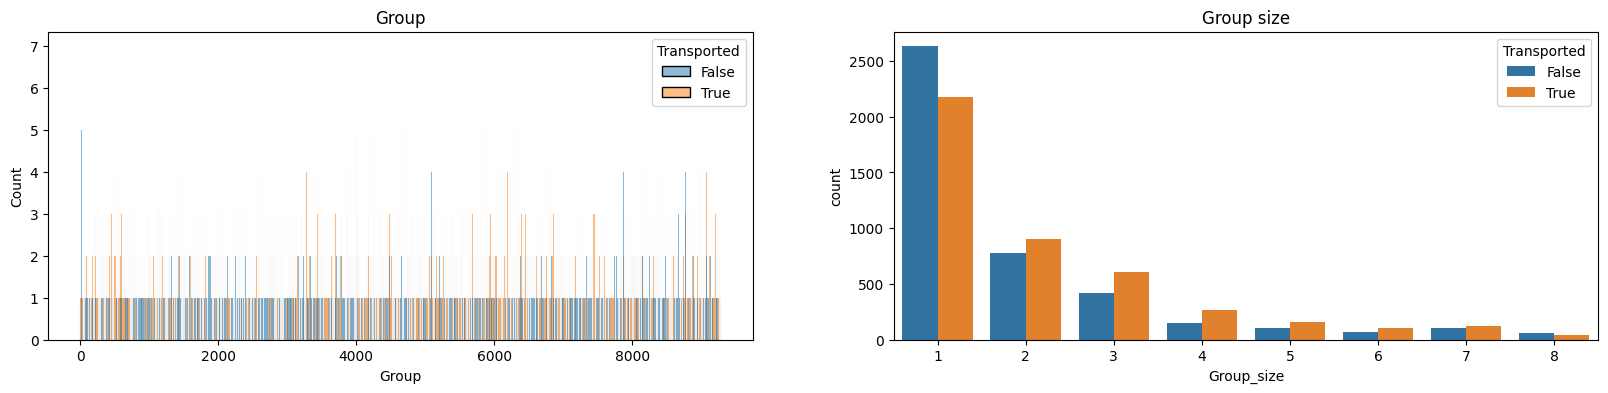

In [5]:
train['Group'] = train['PassengerId'].apply(lambda x: x.split('_')[0]).astype(int)
test['Group'] = test['PassengerId'].apply(lambda x: x.split('_')[0]).astype(int)

train['Group_size']=train['Group'].map(lambda x: pd.concat([train['Group'], test['Group']]).value_counts()[x])
test['Group_size']=test['Group'].map(lambda x: pd.concat([train['Group'], test['Group']]).value_counts()[x])

plt.figure(figsize=(20,4))
plt.subplot(1,2,1)
sns.histplot(data=train, x='Group', hue='Transported', binwidth=1)
plt.title('Group')

plt.subplot(1,2,2)
sns.countplot(data=train, x='Group_size', hue='Transported')
plt.title('Group size')
fig.tight_layout()

(0.0, 3000.0)

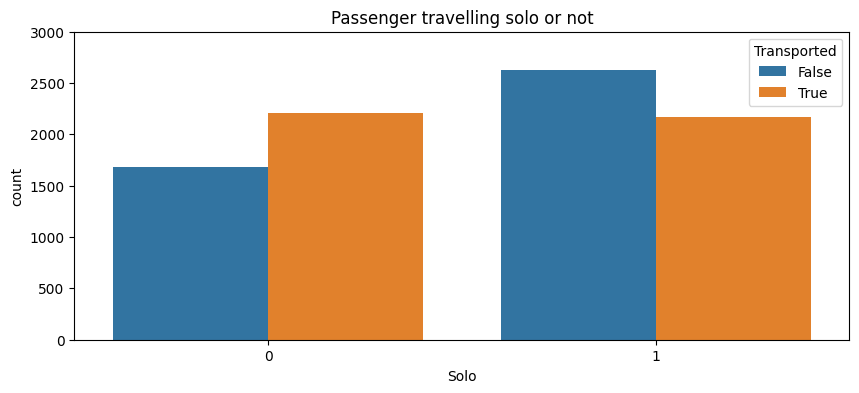

In [6]:
train['Solo']=(train['Group_size']==1).astype(int)
test['Solo']=(test['Group_size']==1).astype(int)

plt.figure(figsize=(10,4))
sns.countplot(data=train, x='Solo', hue='Transported')
plt.title('Passenger travelling solo or not')
plt.ylim([0,3000])

/var/folders/_t/bc40d_jj6qx8qtl_6vh6gmw40000gn/T/ipykernel_90140/4263762009.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Cabin'].fillna('Z/9999/Z', inplace=True)
/var/folders/_t/bc40d_jj6qx8qtl_6vh6gmw40000gn/T/ipykernel_90140/4263762009.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alway

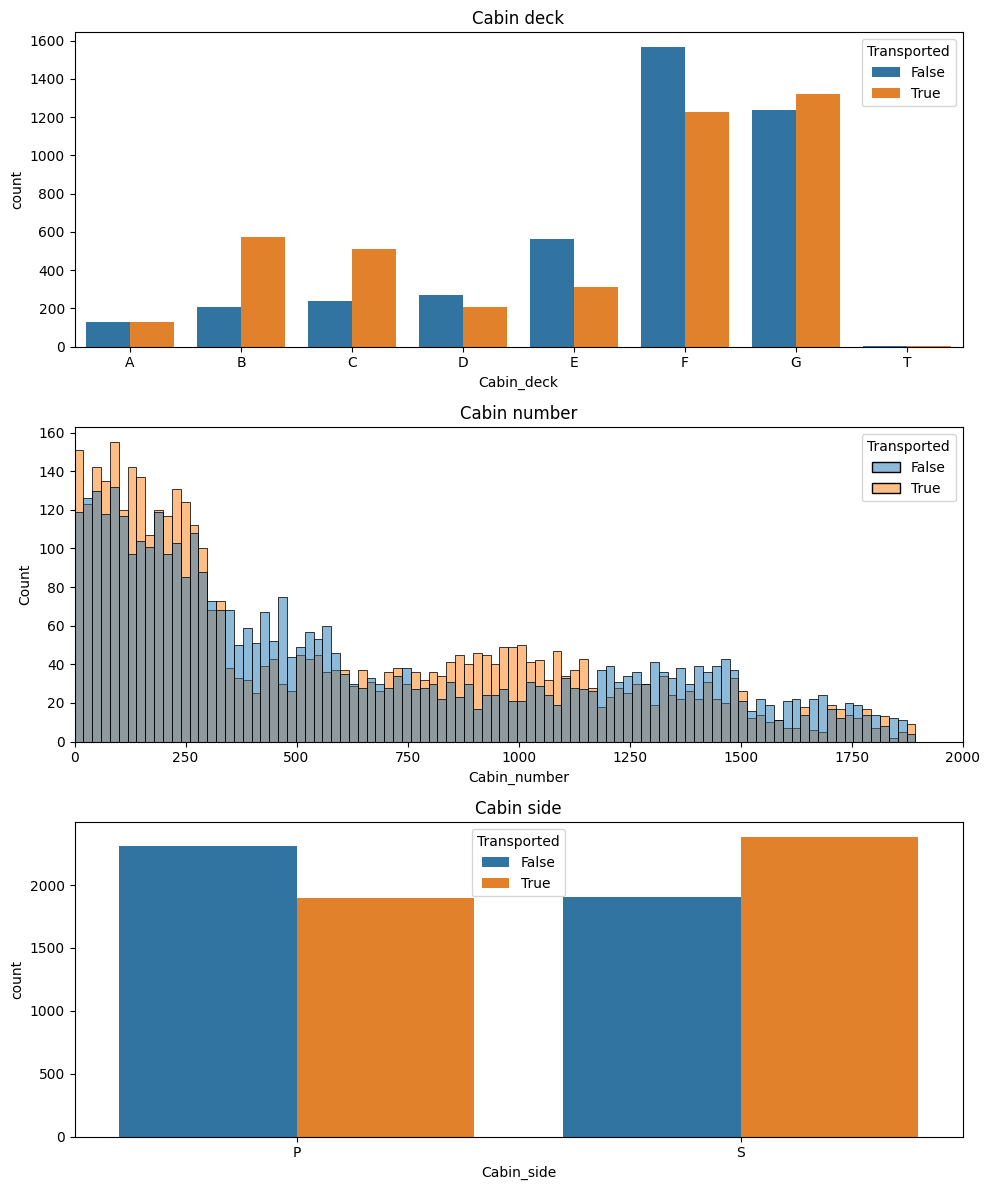

In [7]:
train['Cabin'].fillna('Z/9999/Z', inplace=True)
test['Cabin'].fillna('Z/9999/Z', inplace=True)

train['Cabin_deck'] = train['Cabin'].apply(lambda x: x.split('/')[0])
train['Cabin_number'] = train['Cabin'].apply(lambda x: x.split('/')[1]).astype(int)
train['Cabin_side'] = train['Cabin'].apply(lambda x: x.split('/')[2])

test['Cabin_deck'] = test['Cabin'].apply(lambda x: x.split('/')[0])
test['Cabin_number'] = test['Cabin'].apply(lambda x: x.split('/')[1]).astype(int)
test['Cabin_side'] = test['Cabin'].apply(lambda x: x.split('/')[2])

train.loc[train['Cabin_deck']=='Z', 'Cabin_deck']=np.nan
train.loc[train['Cabin_number']==9999, 'Cabin_number']=np.nan
train.loc[train['Cabin_side']=='Z', 'Cabin_side']=np.nan
test.loc[test['Cabin_deck']=='Z', 'Cabin_deck']=np.nan
test.loc[test['Cabin_number']==9999, 'Cabin_number']=np.nan
test.loc[test['Cabin_side']=='Z', 'Cabin_side']=np.nan


train.drop('Cabin', axis=1, inplace=True)
test.drop('Cabin', axis=1, inplace=True)

fig=plt.figure(figsize=(10,12))
plt.subplot(3,1,1)
sns.countplot(data=train, x='Cabin_deck', hue='Transported', order=['A','B','C','D','E','F','G','T'])
plt.title('Cabin deck')

plt.subplot(3,1,2)
sns.histplot(data=train, x='Cabin_number', hue='Transported',binwidth=20)

plt.title('Cabin number')
plt.xlim([0,2000])

plt.subplot(3,1,3)
sns.countplot(data=train, x='Cabin_side', hue='Transported')
plt.title('Cabin side')
fig.tight_layout()

/var/folders/_t/bc40d_jj6qx8qtl_6vh6gmw40000gn/T/ipykernel_90140/1725397379.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Name'].fillna('Unknown Unknown', inplace=True)
/var/folders/_t/bc40d_jj6qx8qtl_6vh6gmw40000gn/T/ipykernel_90140/1725397379.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values

Text(0.5, 1.0, 'Family size')

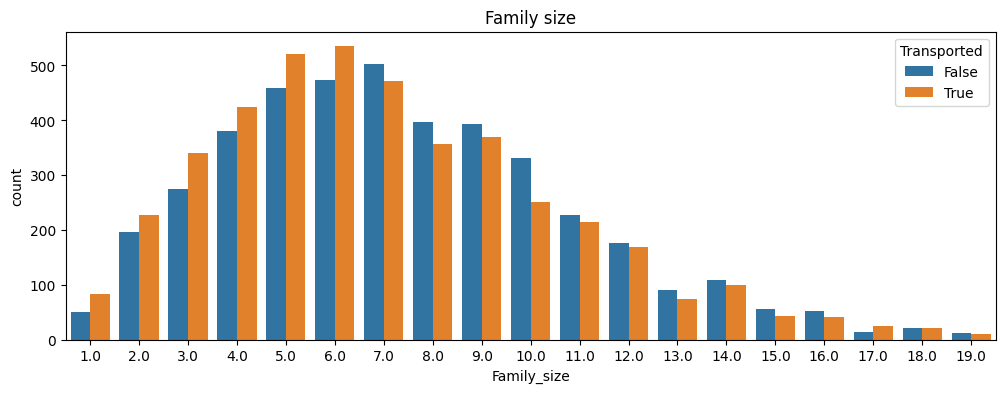

In [8]:
train['Name'].fillna('Unknown Unknown', inplace=True)
test['Name'].fillna('Unknown Unknown', inplace=True)

train['Surname']=train['Name'].str.split().str[-1]
test['Surname']=test['Name'].str.split().str[-1]

train['Family_size']=train['Surname'].map(lambda x: pd.concat([train['Surname'],test['Surname']]).value_counts()[x])
test['Family_size']=test['Surname'].map(lambda x: pd.concat([train['Surname'],test['Surname']]).value_counts()[x])

train.loc[train['Surname']=='Unknown','Surname']=np.nan
train.loc[train['Family_size']>100,'Family_size']=np.nan
test.loc[test['Surname']=='Unknown','Surname']=np.nan
test.loc[test['Family_size']>100,'Family_size']=np.nan

train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

plt.figure(figsize=(12,4))
sns.countplot(data=train, x='Family_size', hue='Transported')
plt.title('Family size')

In [9]:
del_cols = ['PassengerId', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall',
           'Spa', 'VRDeck', 'Surname', 'Cabin_number']

for col in del_cols:
    train.drop(col, axis=1, inplace=True)
    test.drop(col, axis=1, inplace=True)

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   HomePlanet   8492 non-null   object 
 1   CryoSleep    8476 non-null   object 
 2   Destination  8511 non-null   object 
 3   Age          8514 non-null   float64
 4   Transported  8693 non-null   bool   
 5   Expenditure  8693 non-null   float64
 6   No_spending  8693 non-null   int64  
 7   Group        8693 non-null   int64  
 8   Group_size   8693 non-null   int64  
 9   Solo         8693 non-null   int64  
 10  Cabin_deck   8494 non-null   object 
 11  Cabin_side   8494 non-null   object 
 12  Family_size  8493 non-null   float64
dtypes: bool(1), float64(3), int64(4), object(5)
memory usage: 823.6+ KB


In [11]:
train.loc[train['HomePlanet'].isnull(), 'HomePlanet'] = train['HomePlanet'].mode()[0]
train.loc[train['Destination'].isnull(), 'Destination'] = train['Destination'].mode()[0]
train.loc[train['CryoSleep'].isnull(), 'CryoSleep'] = True
train.loc[train['Age'].isnull(), 'Age'] = train['Age'].mean()
train.loc[train['Family_size'].isnull(), 'Family_size'] = 1.0
train.loc[train['Cabin_deck'].isnull(), 'Cabin_deck'] = 'T'
train.loc[train['Cabin_side'].isnull(), 'Cabin_side'] = train['Cabin_side'].mode()[0]

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   HomePlanet   8693 non-null   object 
 1   CryoSleep    8693 non-null   object 
 2   Destination  8693 non-null   object 
 3   Age          8693 non-null   float64
 4   Transported  8693 non-null   bool   
 5   Expenditure  8693 non-null   float64
 6   No_spending  8693 non-null   int64  
 7   Group        8693 non-null   int64  
 8   Group_size   8693 non-null   int64  
 9   Solo         8693 non-null   int64  
 10  Cabin_deck   8693 non-null   object 
 11  Cabin_side   8693 non-null   object 
 12  Family_size  8693 non-null   float64
dtypes: bool(1), float64(3), int64(4), object(5)
memory usage: 823.6+ KB


In [13]:
obj_cols = ['HomePlanet', 'CryoSleep', 'Destination', 'No_spending', 'Cabin_deck', 'Cabin_side']

for col in obj_cols:
    label_encoder = LabelEncoder()
    train[col] = label_encoder.fit_transform(train[col])

train['Transported'] = train['Transported'].astype(np.int64)
train['Age'] = train['Age'].astype(np.int64)

In [14]:
train.head()

,HomePlanet,CryoSleep,Destination,Age,Transported,Expenditure,No_spending,Group,Group_size,Solo,Cabin_deck,Cabin_side,Family_size
0,1,0,2,39,0,0.0,1,1,1,1,1,0,3.0
1,0,0,2,24,1,736.0,0,2,1,1,5,1,4.0
2,1,0,2,58,0,10383.0,0,3,2,0,0,1,7.0
3,1,0,2,33,0,5176.0,0,3,2,0,0,1,7.0
4,0,0,2,16,1,1091.0,0,4,1,1,5,1,9.0


In [15]:
train.to_csv("train_new.csv")
test.to_csv("test_new.csv")